In [ ]:
# In this script we want to solve the system of odes for assembling two 3-membered rings  
# with synthesis and degradation NOT included 
# Name: Leo Lagunes and Paige M.
# Date: 07/14/21 

# Last update: 04/17/22

# IMPORTANT NOTE: The equations were written and developed by Drs. Eric Deeds and Koan Briggs, this code was developed by LL + PM

# Running in python because Julia hasn't really been working just yet


In [8]:
# ---------------------------------------------------
# --- packages to use ---
# ---------------------------------------------------

# First we need to import all of the packages we will be using!\n",
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math
from scipy.integrate import solve_ivp
import seaborn as sns # for the heatmaps
from datetime import date # to print date
from datetime import datetime
from matplotlib.ticker import LogLocator
import matplotlib

print('All packages loaded!')

All packages loaded!


In [17]:
# ---------------------------------------------------
# --- LIST OF FUNCTIONS ---
# ---------------------------------------------------

# All functions necessary are in this cell

# ---------------------------------------------------    
# --- Keff function ---
# ---------------------------------------------------
def keff(i,j):
    # calculate the k_effective value given the i,j indices and the kd's (binding affinities)
    ℯ = math.e
    #kd1 = kds[0]; kd2 = kds[1]
    keff= kOn*(kd1**i)*(kd2**j)*ℯ**(-(i+j-1)*9/0.6)
    
    return keff

# ---------------------------------------------------
# --- EJD Eqns for stacked trimer ---   
# ---------------------------------------------------
def stackedTrimer(states, t):
    #x0Val = paramvaluesList[0] # initial condition for x1 
    x = states
    # list of ode's
    dx_0 = - 2*kOn*0.5*x[0]*x[0] + 1*keff(1,0)*x[1] - 2*kOn*0.5*x[0]*x[0] + 1*keff(1,0)*x[1] - 1*kOn*0.5*x[0]*x[0] + 1*keff(0,1)*x[2] - 1*kOn*0.5*x[0]*x[0] + 1*keff(0,1)*x[2] - 1*kOn*1*x[0]*x[1] + 3*keff(2,0)*x[3] - 1*kOn*1*x[0]*x[1] + 1*keff(0,1)*x[4] - 1*kOn*1*x[0]*x[1] + 1*keff(0,1)*x[5] - 2*kOn*1*x[0]*x[2] + 1*keff(1,0)*x[5] - 2*kOn*1*x[0]*x[2] + 1*keff(1,0)*x[4] - 3*kOn*1*x[0]*x[3] + 1*keff(0,1)*x[6] - 1*kOn*1*x[0]*x[4] + 1*keff(2,0)*x[6] - 1*kOn*1*x[0]*x[4] + 2*keff(1,0)*x[7] - 1*kOn*1*x[0]*x[4] + 2*keff(1,1)*x[8] - 1*kOn*1*x[0]*x[5] + 1*keff(2,0)*x[6] - 1*kOn*1*x[0]*x[5] + 2*keff(1,1)*x[8] - 1*kOn*1*x[0]*x[5] + 2*keff(1,0)*x[9] - 2*kOn*1*x[0]*x[6] + 2*keff(1,1)*x[10] - 2*kOn*1*x[0]*x[7] + 1*keff(2,1)*x[10] - 2*kOn*1*x[0]*x[8] + 1*keff(2,0)*x[10] - 2*kOn*1*x[0]*x[9] + 1*keff(2,1)*x[10] - 1*kOn*1*x[0]*x[10] + 6*keff(2,1)*x[11]  
    dx_1 = + 2*kOn*0.5*x[0]*x[0] - 1*keff(1,0)*x[1] - 1*kOn*1*x[0]*x[1] + 3*keff(2,0)*x[3] - 1*kOn*1*x[0]*x[1] + 1*keff(0,1)*x[4] - 1*kOn*1*x[0]*x[1] + 1*keff(0,1)*x[5] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,2)*x[8] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,2)*x[8] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,1)*x[9] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,1)*x[9] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,1)*x[7] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,1)*x[7] - 2*kOn*1*x[1]*x[2] + 1*keff(2,0)*x[6] - 3*kOn*1*x[1]*x[3] + 1*keff(0,2)*x[10] - 1*kOn*1*x[1]*x[4] + 1*keff(2,1)*x[10] - 1*kOn*1*x[1]*x[5] + 1*keff(2,1)*x[10] - 1*kOn*1*x[1]*x[6] + 6*keff(2,2)*x[11]  
    dx_2 = + 1*kOn*0.5*x[0]*x[0] - 1*keff(0,1)*x[2] - 2*kOn*1*x[0]*x[2] + 1*keff(1,0)*x[5] - 2*kOn*1*x[0]*x[2] + 1*keff(1,0)*x[4] - 2*kOn*1*x[1]*x[2] + 1*keff(2,0)*x[6] - 4*kOn*0.5*x[2]*x[2] + 1*keff(2,0)*x[8] - 4*kOn*0.5*x[2]*x[2] + 1*keff(2,0)*x[8] - 2*kOn*1*x[2]*x[4] + 1*keff(3,0)*x[10] - 2*kOn*1*x[2]*x[5] + 1*keff(3,0)*x[10] - 2*kOn*1*x[2]*x[8] + 3*keff(4,0)*x[11]  
    dx_3 = + 1*kOn*1*x[0]*x[1] - 3*keff(2,0)*x[3] - 3*kOn*1*x[0]*x[3] + 1*keff(0,1)*x[6] - 3*kOn*1*x[1]*x[3] + 1*keff(0,2)*x[10] - 3*kOn*0.5*x[3]*x[3] + 1*keff(0,3)*x[11] - 3*kOn*0.5*x[3]*x[3] + 1*keff(0,3)*x[11]  
    dx_4 = + 1*kOn*1*x[0]*x[1] - 1*keff(0,1)*x[4] + 2*kOn*1*x[0]*x[2] - 1*keff(1,0)*x[4] - 1*kOn*1*x[0]*x[4] + 1*keff(2,0)*x[6] - 1*kOn*1*x[0]*x[4] + 2*keff(1,0)*x[7] - 1*kOn*1*x[0]*x[4] + 2*keff(1,1)*x[8] - 1*kOn*1*x[1]*x[4] + 1*keff(2,1)*x[10] - 2*kOn*1*x[2]*x[4] + 1*keff(3,0)*x[10] - 1*kOn*0.5*x[4]*x[4] + 3*keff(4,1)*x[11] - 1*kOn*0.5*x[4]*x[4] + 3*keff(4,1)*x[11]  
    dx_5 = + 1*kOn*1*x[0]*x[1] - 1*keff(0,1)*x[5] + 2*kOn*1*x[0]*x[2] - 1*keff(1,0)*x[5] - 1*kOn*1*x[0]*x[5] + 1*keff(2,0)*x[6] - 1*kOn*1*x[0]*x[5] + 2*keff(1,1)*x[8] - 1*kOn*1*x[0]*x[5] + 2*keff(1,0)*x[9] - 1*kOn*1*x[1]*x[5] + 1*keff(2,1)*x[10] - 2*kOn*1*x[2]*x[5] + 1*keff(3,0)*x[10] - 1*kOn*0.5*x[5]*x[5] + 3*keff(4,1)*x[11] - 1*kOn*0.5*x[5]*x[5] + 3*keff(4,1)*x[11]  
    dx_6 = + 3*kOn*1*x[0]*x[3] - 1*keff(0,1)*x[6] + 1*kOn*1*x[0]*x[4] - 1*keff(2,0)*x[6] + 1*kOn*1*x[0]*x[5] - 1*keff(2,0)*x[6] - 2*kOn*1*x[0]*x[6] + 2*keff(1,1)*x[10] + 2*kOn*1*x[1]*x[2] - 1*keff(2,0)*x[6] - 1*kOn*1*x[1]*x[6] + 6*keff(2,2)*x[11]  
    dx_7 = + 1*kOn*1*x[0]*x[4] - 2*keff(1,0)*x[7] - 2*kOn*1*x[0]*x[7] + 1*keff(2,1)*x[10] + 1*kOn*0.5*x[1]*x[1] - 1*keff(0,1)*x[7]  
    dx_8 = + 1*kOn*1*x[0]*x[4] - 2*keff(1,1)*x[8] + 1*kOn*1*x[0]*x[5] - 2*keff(1,1)*x[8] - 2*kOn*1*x[0]*x[8] + 1*keff(2,0)*x[10] + 1*kOn*0.5*x[1]*x[1] - 1*keff(0,2)*x[8] + 4*kOn*0.5*x[2]*x[2] - 1*keff(2,0)*x[8] - 2*kOn*1*x[2]*x[8] + 3*keff(4,0)*x[11]  
    dx_9 = + 1*kOn*1*x[0]*x[5] - 2*keff(1,0)*x[9] - 2*kOn*1*x[0]*x[9] + 1*keff(2,1)*x[10] + 1*kOn*0.5*x[1]*x[1] - 1*keff(0,1)*x[9]  
    dx_10 = + 2*kOn*1*x[0]*x[6] - 2*keff(1,1)*x[10] + 2*kOn*1*x[0]*x[7] - 1*keff(2,1)*x[10] + 2*kOn*1*x[0]*x[8] - 1*keff(2,0)*x[10] + 2*kOn*1*x[0]*x[9] - 1*keff(2,1)*x[10] - 1*kOn*1*x[0]*x[10] + 6*keff(2,1)*x[11] + 3*kOn*1*x[1]*x[3] - 1*keff(0,2)*x[10] + 1*kOn*1*x[1]*x[4] - 1*keff(2,1)*x[10] + 1*kOn*1*x[1]*x[5] - 1*keff(2,1)*x[10] + 2*kOn*1*x[2]*x[4] - 1*keff(3,0)*x[10] + 2*kOn*1*x[2]*x[5] - 1*keff(3,0)*x[10]  
    dx_11 = + 1*kOn*1*x[0]*x[10] - 6*keff(2,1)*x[11] + 1*kOn*1*x[1]*x[6] - 6*keff(2,2)*x[11] + 2*kOn*1*x[2]*x[8] - 3*keff(4,0)*x[11] + 3*kOn*0.5*x[3]*x[3] - 1*keff(0,3)*x[11] + 1*kOn*0.5*x[4]*x[4] - 3*keff(4,1)*x[11] + 1*kOn*0.5*x[5]*x[5] - 3*keff(4,1)*x[11]  
   
    states_prime = [dx_0, dx_1,dx_2,dx_3,dx_4, dx_5, dx_6,dx_7,dx_8,dx_9,dx_10,dx_11]
    
    return states_prime 

# ---------------------------------------------------
# --- Assembly Yield --- 
# ---------------------------------------------------
def calcAY24hrs(IC_1,XnTimePtsVec):
    # this function calculates the assembly yield for a time course of one species
    n=6; Xn = XnTimePtsVec;
    # --- calculate XT --- 
    # define XT as the IC of monomers (predefined - compare them-maybe Xn)
    XT = IC_1; # print(XT)
    # --- calculate Yn ---
    Yn = n*Xn/XT;
    
    return Yn

# ---------------------------------------------------
# --- Assembly Yield vs IC --- 
# ---------------------------------------------------
def calcAYvsIC(minDeg_IC, maxDeg_IC, nICpts):
    # this function calculates the AY for varying values of IC
    mags = np.linspace(minDeg_IC, maxDeg_IC,nICpts)
    allICs = 10**mags
    # initialize lists to stor
    AY_list = []
    # loop to solve AY for each IC 
    for icVal in allICs:
        # for each IC calc the sols and AY 
        IC_1=icVal
        states_0 = [IC_1,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0]
        # Now, integrate the ODEs and put the results in \"solution\"
        # If the concentration is high, need different tols!
        if icVal > 10**-5:
            solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-9, atol = 1e-9)      
        else:
            solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)
            
        if kd1 == 10**-8:
            solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12) 
        
        tVec = t; xStkTrm_tps_1 = solution_1[:,-1]
        # calculate AY
        Yn_1 = calcAY24hrs(IC_1,xStkTrm_tps_1)
        # store the last AY value - since tc stops at 24hrs that's the AY at 24hrs
        AY_valStr = Yn_1[-1];
        AY_list.append(AY_valStr)
        
    return allICs, AY_list

# ---------------------------------------------------
# --- Heatmap number formatting --- 
# ---------------------------------------------------
def precision_round(number, digits=3):
    power = "{:e}".format(number).split('e')[1]
    return round(number, -(int(power) - digits))



# --- Today --- 
now = datetime.now(); dt_string = now.strftime("%m/%d/%Y %H:%M:%S")
today_pre = date.today()
today = today_pre.strftime("%m_%d_%y")
print("Functions ready...", dt_string)


Functions ready... 04/17/2022 15:03:45


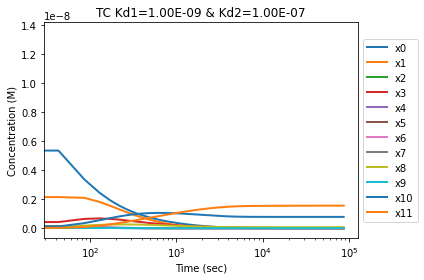

In [3]:
# ---------------------------------------------------
# --- Stacked trimer time course ---
# ---------------------------------------------------

# Plot a single time course for fixed parameter values

# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
δ = 0 # degradation rate parameter
Q = 0 # synthesis rate parameter

# List of parameters that will be explored 
IC_1 = 1.35*10**-8;
kd1 = 10**-9 # binding affinity WITHIN rings (intra)
kd2 = 10**-7 # binding affinity BETWEEN rings (inter)

states_0 = [IC_1,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0]
# parametersList= [kOn,δ,Q, kd1,kd2]

# To intgrate ODEs, we need a vector for time
# Note that the units on t are in seconds
tEnd = 86400 # 24hrs
t = np.linspace(0,tEnd,2000)
# Now, integrate the ODEs and put the results in \"solution\"
solution = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)

ICFormat = format(IC_1,'.2E');kd1_format = format(kd1,'.2E');kd2_format = format(kd2,'.2E')

plt.semilogx(t,solution,'-',linewidth=2)
plt.title('TC Kd1=' + kd1_format + ' & Kd2=' + kd2_format)
plt.xlabel('Time (sec)')
plt.ylabel('Concentration (M)')
plt.legend(('x0','x1', 'x2','x3', 'x4','x5', 'x6','x7', 'x8','x9', 'x10','x11'),loc='center left', bbox_to_anchor=(1, 0.5))
#plt.show()  

# 
plt.tight_layout()
#plt.savefig('LL_tc_poster_kd1kd2_01_0329.png')
#plt.savefig('LL_tc_poster_kd1kd2_02_0329.png')
#plt.savefig('LL_tc_poster_kd1kd2_03_0329.png')
    

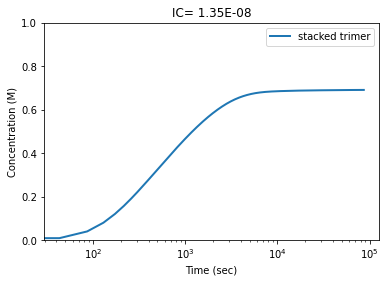

In [10]:
# ---------------------------------------------------
# --- Assembly Yield ---
# ---------------------------------------------------

# Calculate the assembly yield for a time course of the 12th species

tVec = t;
xStkTrm_tps = solution[:,-1] # the fully stacked trimer

Yn = calcAY24hrs(IC_1,xStkTrm_tps)

# --- plot AY values --- 
plt.semilogx(tVec,Yn,'-',linewidth=2)
x1,x2,y1,y2 = plt.axis(); plt.axis((x1,x2,0,1))

plt.title('IC= '+ ICFormat)
plt.xlabel('Time (sec)')
plt.ylabel('Concentration (M)')
plt.legend(["stacked trimer"],loc='best')
#plt.show()  

#plt.tight_layout()
#plt.savefig('LL_SR_AY_odeInt_tols_m10_IC_4.58E-7_0324.png')

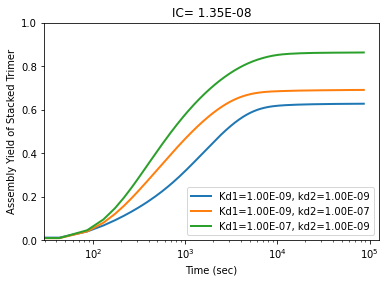

In [30]:
# ---------------------------------------------------
# --- Assembly Yield ---
# ---------------------------------------------------

# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
δ = 0 # degradation rate parameter
Q = 0 # synthesis rate parameter


# List of parameters that will be explored 
IC_1 = 1.35*10**-8;
kd1 = 10**-9 # binding affinity WITHIN rings (intra)
kd2 = 10**-9 # binding affinity BETWEEN rings (inter)

states_0 = [IC_1,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0]

# To intgrate ODEs, we need a vector for time
tEnd = 86400 # 24hrs
t = np.linspace(0,tEnd,2000)
# Now, integrate the ODEs and put the results in \"solution\"
# --- kd1 = kd2 = 10^-9 ---
kd1_1 = kd1; kd2_1= kd2;
solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)
# --- kd1 = 10^-9 & kd2 = 10^-7 ---
kd1 = 10**-9 # binding affinity WITHIN rings (intra)
kd2 = 10**-7 # binding affinity BETWEEN rings (inter)
kd1_2 = kd1; kd2_2= kd2;
solution_2 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)
# --- kd1 = 10^-7 & kd2 = 10^-9 ---
kd1 = 10**-7 # binding affinity WITHIN rings (intra)
kd2 = 10**-9 # binding affinity BETWEEN rings (inter)
kd1_3 = kd1; kd2_3= kd2;
solution_3 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)

# Calculate the assembly yield for each time course of the 12th species
tVec = t;
xStkTrm_tps_1 = solution_1[:,-1] # the fully stacked trimer
xStkTrm_tps_2 = solution_2[:,-1]
xStkTrm_tps_3 = solution_3[:,-1]

Yn_1 = calcAY24hrs(IC_1,xStkTrm_tps_1)
Yn_2 = calcAY24hrs(IC_1,xStkTrm_tps_2)
Yn_3 = calcAY24hrs(IC_1,xStkTrm_tps_3)

# --- plot AY values --- 
ICFormat = format(IC_1,'.2E');
kd1_format_1 = format(kd1_1,'.2E');kd2_format_1 = format(kd2_1,'.2E')
kd1_format_2 = format(kd1_2,'.2E');kd2_format_2 = format(kd2_2,'.2E')
kd1_format_3 = format(kd1_3,'.2E');kd2_format_3 = format(kd2_3,'.2E')

plt.semilogx(tVec,Yn_1,'-',linewidth=2)
plt.semilogx(tVec,Yn_2,'-',linewidth=2)
plt.semilogx(tVec,Yn_3,'-',linewidth=2)
x1,x2,y1,y2 = plt.axis(); plt.axis((x1,x2,0,1))

plt.title('IC= '+ ICFormat)
plt.xlabel('Time (sec)')
plt.ylabel('Assembly Yield of Stacked Trimer')
plt.legend(["Kd1="+kd1_format_1+", kd2=" +kd2_format_1, "Kd1="+kd1_format_2+", kd2=" +kd2_format_2, "Kd1="+kd1_format_3+", kd2=" +kd2_format_3],loc='best')
#plt.show()  

#plt.tight_layout()
plt.savefig('LL_SR_AY_poster_0329.png')

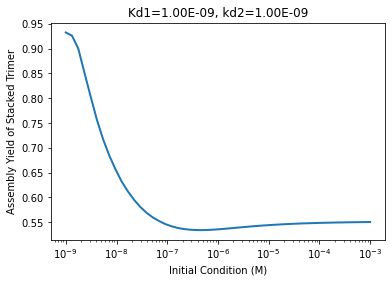

In [44]:
# ---------------------------------------------------
# --- Plot AY vs IC ---
# ---------------------------------------------------

# calculate the AY for increasing IC 

# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
δ = 0 # degradation rate parameter
Q = 0 # synthesis rate parameter
# Binding strengths
kd1 = 10**-9 # binding affinity WITHIN rings (intra)
kd2 = 10**-9 # binding affinity BETWEEN rings (inter)
# other parameters 
tEnd = 86400 # 24hrs
t = np.linspace(0,tEnd,2000)

# make vector of all IC to consider
nICpts=50;
minDeg_IC = -9; maxDeg_IC = -3;

allAY_ICs = calcAYvsIC(minDeg_IC, maxDeg_IC, nICpts)
allICs = allAY_ICs[0]; AYvsIC_1=allAY_ICs[1]

# now plot AY vs IC
kd1_format_1 = format(kd1,'.2E');kd2_format_1 = format(kd2,'.2E')

fig2 = plt.semilogx(allICs,AYvsIC_1,'-',linewidth=2)
#plt.axis((x1,x2,0,1))
plt.title("Kd1="+kd1_format_1+", kd2=" +kd2_format_1)
plt.xlabel('Initial Condition (M)')
plt.ylabel('Assembly Yield of Stacked Trimer')
#plt.show()  
#plt.tight_layout()
plt.savefig('LL_SR_AYvsIC_0404.png')

/Users/leolagunes/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


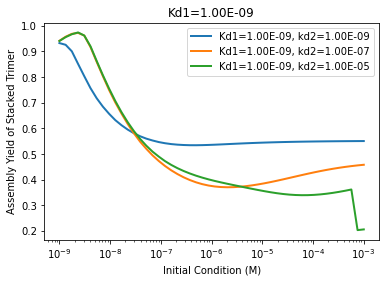

In [48]:
# ---------------------------------------------------
# --- Plot AY vs IC ---
# ---------------------------------------------------

# calculate the AY for increasing IC with various Kd2 values

# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
δ = 0 # degradation rate parameter
Q = 0 # synthesis rate parameter
# Binding strengths
kd1 = 10**-9 # binding affinity WITHIN rings (intra)
kd2 = 10**-9 # binding affinity BETWEEN rings (inter)
# other parameters 
tEnd = 86400 # 24hrs
t = np.linspace(0,tEnd,2000)

# make vector of all IC to consider
nICpts=50;
minDeg_IC = -9; maxDeg_IC = -3;

# --- kd1 = kd2 = 10^-9 ---
kd1_1 = kd1; kd2_1= kd2;
allAY_ICs = calcAYvsIC(minDeg_IC, maxDeg_IC, nICpts)
allICs_1 = allAY_ICs[0]; AYvsIC_1=allAY_ICs[1]
# --- kd1 = 10^-9 & kd2 = 10^-7 ---
kd1 = 10**-9 ; kd2 = 10**-7 
kd1_2 = kd1; kd2_2= kd2;
allAY_ICs = calcAYvsIC(minDeg_IC, maxDeg_IC, nICpts)
allICs_2 = allAY_ICs[0]; AYvsIC_2=allAY_ICs[1]
# --- kd1 = 10^-7 & kd2 = 10^-9 ---
kd1 = 10**-9; kd2 = 10**-5
kd1_3 = kd1; kd2_3= kd2;
allAY_ICs = calcAYvsIC(minDeg_IC, maxDeg_IC, nICpts)
allICs_3 = allAY_ICs[0]; AYvsIC_3=allAY_ICs[1]


# now plot AY vs IC
kd1_format_1 = format(kd1_1,'.2E');kd2_format_1 = format(kd2_1,'.2E')
kd1_format_2 = format(kd1_2,'.2E');kd2_format_2 = format(kd2_2,'.2E')
kd1_format_3 = format(kd1_3,'.2E');kd2_format_3 = format(kd2_3,'.2E')

fig2 = plt.semilogx(allICs,AYvsIC_1,'-',linewidth=2)
fig2 = plt.semilogx(allICs,AYvsIC_2,'-',linewidth=2)
fig2 = plt.semilogx(allICs,AYvsIC_3,'-',linewidth=2)
#plt.axis((x1,x2,0,1))
plt.title("Kd1="+kd1_format_1)
plt.xlabel('Initial Condition (M)')
plt.ylabel('Assembly Yield of Stacked Trimer')
plt.legend(["Kd1="+kd1_format_1+", kd2=" +kd2_format_1, "Kd1="+kd1_format_2+", kd2=" +kd2_format_2, "Kd1="+kd1_format_3+", kd2=" +kd2_format_3],loc='best')
#plt.show()  
#plt.tight_layout()
plt.savefig('LL_SR_AYvsIC_3kd2s_0404.png')

In [18]:
# ---------------------------------------------------
# --- Plot AY vs IC ---
# ---------------------------------------------------

# calculate the AY for increasing IC with various Kd2 values
# Koan's values

# Fix the numerical instability towards the higher concentrations there! 
# 04/13/22

# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
δ = 0 # degradation rate parameter
Q = 0 # synthesis rate parameter
# other parameters 
tEnd = 86400 # 24hrs
t = np.linspace(0,tEnd,2000)

# make vector of all IC to consider
nICpts=100;
minDeg_IC = -12; maxDeg_IC = -3;

print("Working on AY vs IC...")
# RED
# --- kd1 = 10^-3 & kd2 = 10^-12 ---
# Binding strengths
kd1 = 10**-3 
kd2 = 10**-12 
kd1_1 = kd1; kd2_1= kd2;
allAY_ICs = calcAYvsIC(minDeg_IC, maxDeg_IC, nICpts)
allICs_1 = allAY_ICs[0]; AYvsIC_1=allAY_ICs[1]
# GREEN
# --- kd1 = 10^-12 & kd2 = 10^-12 ---
kd1 = 10**-12 ; kd2 = 10**-12 
kd1_2 = kd1; kd2_2= kd2;
allAY_ICs = calcAYvsIC(minDeg_IC, maxDeg_IC, nICpts)
allICs_2 = allAY_ICs[0]; AYvsIC_2=allAY_ICs[1]
# ORANGE
# --- kd1 = 10^-8 & kd2 = 10^-8 ---
kd1 = 10**-8; kd2 = 10**-8
kd1_3 = kd1; kd2_3= kd2;
allAY_ICs = calcAYvsIC(minDeg_IC, maxDeg_IC, nICpts)
allICs_3 = allAY_ICs[0]; AYvsIC_3=allAY_ICs[1]
# BLUE
# --- kd1 = 10^-3 & kd2 = 10^-3 ---
kd1 = 10**-3; kd2 = 10**-3
kd1_4 = kd1; kd2_4= kd2;
allAY_ICs = calcAYvsIC(minDeg_IC, maxDeg_IC, nICpts)
allICs_4 = allAY_ICs[0]; AYvsIC_4=allAY_ICs[1]
# PURPLE
# --- kd1 = 10^-12 & kd2 = 10^-3 ---
kd1 = 10**-12; kd2 = 10**-3
kd1_5 = kd1; kd2_5= kd2;
allAY_ICs = calcAYvsIC(minDeg_IC, maxDeg_IC, nICpts)
allICs_5 = allAY_ICs[0]; AYvsIC_5=allAY_ICs[1]

print("Done with AY vs IC pts")

Working on AY vs IC...


/Users/leolagunes/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Done with AY vs IC pts


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


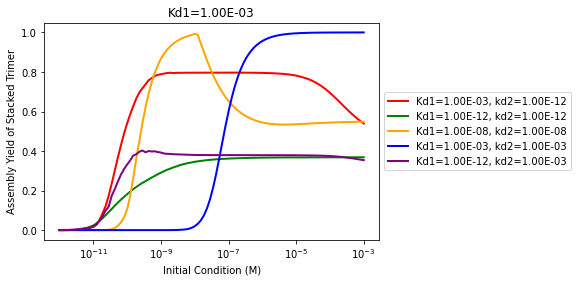

In [20]:
# --- now plot AY vs IC ---
kd1_format_1 = format(kd1_1,'.2E');kd2_format_1 = format(kd2_1,'.2E')
kd1_format_2 = format(kd1_2,'.2E');kd2_format_2 = format(kd2_2,'.2E')
kd1_format_3 = format(kd1_3,'.2E');kd2_format_3 = format(kd2_3,'.2E')
kd1_format_4 = format(kd1_4,'.2E');kd2_format_4 = format(kd2_4,'.2E')
kd1_format_5 = format(kd1_5,'.2E');kd2_format_5 = format(kd2_5,'.2E')

fig2 = plt.semilogx(allICs_1,AYvsIC_1,'r-',linewidth=2)
fig2 = plt.semilogx(allICs_2,AYvsIC_2,'g-',linewidth=2)
fig2 = plt.semilogx(allICs_3,AYvsIC_3,'-',linewidth=2, color='orange')
fig2 = plt.semilogx(allICs_4,AYvsIC_4,'b-',linewidth=2)
fig2 = plt.semilogx(allICs_5,AYvsIC_5,'-',linewidth=2, color='purple')

#plt.axis((x1,x2,0,1))
plt.title("Kd1="+kd1_format_1)
plt.xlabel('Initial Condition (M)')
plt.ylabel('Assembly Yield of Stacked Trimer')
plt.legend(["Kd1="+kd1_format_1+", kd2=" +kd2_format_1, "Kd1="+kd1_format_2+", kd2=" +kd2_format_2, "Kd1="+kd1_format_3+", kd2=" +kd2_format_3,  "Kd1="+kd1_format_4+", kd2=" +kd2_format_4, "Kd1="+kd1_format_5+", kd2=" +kd2_format_5],loc='center left', bbox_to_anchor=(1, 0.5))
#plt.show()  
#plt.tight_layout()
#plt.savefig('LL_SR_AYvsIC_KoanVals_100pts_0404.png')
plt.savefig('LL_SR_AYvsIC_n100_'+today+'.eps')

In [11]:
# ---------------------------------------------------
# --- Plot AY vs IC HEATMAP ---
# ---------------------------------------------------

# calculate the AY for increasing IC with various Kd2 values on a heatmap 

# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
δ = 0 # degradation rate parameter
Q = 0 # synthesis rate parameter
kd1 = 10**-9
# other parameters 
tEnd = 86400 # 24hrs
t = np.linspace(0,tEnd,2000)

print("Running for fixed Kd1...")
# initializations 
nICpts=50;nKdspts=50;
minDeg_IC=-9;maxDeg_IC=-3; # IC pts
minDeg_kd=-9;maxDeg_kd=-3; # Kd pts

# start of function here!
mags_IC = np.linspace(minDeg_IC, maxDeg_IC,nICpts)
allICs = 10**mags_IC
mags_IC = np.linspace(minDeg_kd, maxDeg_kd,nKdspts)
allKd2 = 10**mags_IC

IC_kd2_AY_mat=np.zeros((nICpts,nKdspts))
# loop to solve AY for each IC 
for indIC in range(0,nICpts): # for each IC 
    icVal = allICs[indIC]
    for kd2ind in range(0,nKdspts): # for each value of kd2
        kd2_val=allKd2[kd2ind]
        IC_1=icVal; kd2 = kd2_val
        states_0 = [IC_1,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0]
        # Now, integrate the ODEs and put the results in \"solution\"
        solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)
        tVec = t; xStkTrm_tps_1 = solution_1[:,-1]
        # calculate AY
        Yn_1 = calcAY24hrs(IC_1,xStkTrm_tps_1)
        # store the last AY value - since tc stops at 24hrs that's the AY at 24hrs
        AY_valStr = Yn_1[-1]; 
        #print("IC= " + str(icVal) + " , Kd2= " + str(kd2_val) + " , AY= " +  str(AY_valStr))
        IC_kd2_AY_mat[kd2ind][indIC] = AY_valStr # IC on x-axis, Kd on y-axis
        
#print(IC_kd2_AY_mat)
#print("All ICs: ", allICs)
#print("All Kd2s: ", allKd2)
print("Done will all pts!")

Running for fixed Kd1...
Done will all pts!


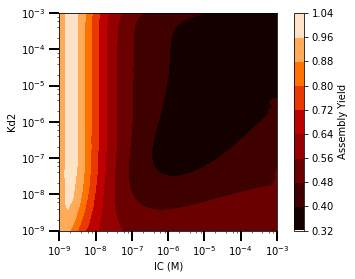

In [13]:
# Plot heatmap for AY IC vs Kd2

#AYmatPlt = np.flipud(kd1_kd2_AY_mat)
AYmatPlt = IC_kd2_AY_mat

fig, ax = plt.subplots()
# im = ax.imshow(AYmatPlt)
CS = ax.contourf(allICs, allKd2, AYmatPlt,cmap=plt.cm.gist_heat)
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Assembly Yield')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_aspect('equal')

# get ticks on log scale
ax.tick_params(axis="x", direction="out", length=10, width=2, color="black")
ax.tick_params(axis="y", direction="out", length=10, width=2, color="black")

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.xaxis.set_minor_locator(locmin); ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.set_xlabel('IC (M)', fontsize=10)
ax.set_ylabel('Kd2', fontsize=10)

#plt.show()
# --- save figure ---
#plt.tight_layout()
plt.savefig('LL_SR_heatmap_AYvsICvsKd2_n50_'+today+'.png')

In [3]:
# ---------------------------------------------------
# --- Plot AY vs IC HEATMAP ---
# ---------------------------------------------------

# calculate the AY for increasing IC with various Kd2 values on a heatmap 

# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
δ = 0 # degradation rate parameter
Q = 0 # synthesis rate parameter
kd2 = 10**-9
# other parameters 
tEnd = 86400 # 24hrs
t = np.linspace(0,tEnd,2000)

print("Running for fixed Kd2...")
# initializations 
nICpts=50;nKdspts=50;
minDeg_IC=-9;maxDeg_IC=-3; # IC pts
minDeg_kd=-9;maxDeg_kd=-3; # Kd pts

# start of function here!
mags_IC = np.linspace(minDeg_IC, maxDeg_IC,nICpts)
allICs = 10**mags_IC
mags_Kd = np.linspace(minDeg_kd, maxDeg_kd,nKdspts)
allKd1 = 10**mags_Kd

IC_kd1_AY_mat=np.zeros((nICpts,nKdspts))
# loop to solve AY for each IC 
for indIC in range(0,nICpts): # for each IC 
    icVal = allICs[indIC]
    for kd1ind in range(0,nKdspts): # for each value of kd2
        kd1_val=allKd1[kd1ind]
        IC_1=icVal; kd1 = kd1_val
        states_0 = [IC_1,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0]
        # Now, integrate the ODEs and put the results in \"solution\"
        solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)
        tVec = t; xStkTrm_tps_1 = solution_1[:,-1]
        # calculate AY
        Yn_1 = calcAY24hrs(IC_1,xStkTrm_tps_1)
        # store the last AY value - since tc stops at 24hrs that's the AY at 24hrs
        AY_valStr = Yn_1[-1]; 
        #print("IC= " + str(icVal) + " , Kd2= " + str(kd2_val) + " , AY= " +  str(AY_valStr))
        IC_kd1_AY_mat[kd1ind][indIC] = AY_valStr # IC on x-axis, Kd on y-axis
        
#print(IC_kd2_AY_mat)
#print("All ICs: ", allICs)
#print("All Kd2s: ", allKd2)
print("Done will all pts!")

Running for fixed Kd2...


/Users/leolagunes/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Done will all pts!


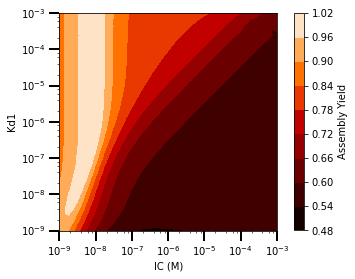

In [10]:
# Plot heatmap for AY IC vs Kd1

#AYmatPlt = np.flipud(kd1_kd2_AY_mat)
AYmatPlt = IC_kd1_AY_mat

fig, ax = plt.subplots()
# im = ax.imshow(AYmatPlt)
CS = ax.contourf(allICs, allKd1, AYmatPlt,cmap=plt.cm.gist_heat)
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Assembly Yield')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_aspect('equal')

# get ticks on log scale
ax.tick_params(axis="x", direction="out", length=10, width=2, color="black")
ax.tick_params(axis="y", direction="out", length=10, width=2, color="black")

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.xaxis.set_minor_locator(locmin); ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.set_xlabel('IC (M)', fontsize=10)
ax.set_ylabel('Kd1', fontsize=10)

#plt.show()
# --- save figure ---
#plt.tight_layout()
plt.savefig('LL_SR_heatmap_AYvsICvsKd2_n50_'+today+'.png')

In [54]:
# ---------------------------------------------------
# --- Plot AY vs Kd1 vs Kd2 HEATMAP ---
# ---------------------------------------------------

# calculate the AY for Kd1 vs Kd2 values on a heatmap 

# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
δ = 0 # degradation rate parameter
Q = 0 # synthesis rate parameter
IC_val = 10**-6
# other parameters 
tEnd = 86400 # 24hrs
t = np.linspace(0,tEnd,2000)

print("Running for fixed IC...")
# initializations 
nKdspts=50;
minDeg_kd1=-12;maxDeg_kd1=-3; # Kd1 pts
minDeg_kd2=-12;maxDeg_kd2=-3; # Kd2 pts

# start of function here!
mags_Kd1 = np.linspace(minDeg_kd1, maxDeg_kd1,nKdspts)
allKd1 = 10**mags_Kd1
mags_Kd2 = np.linspace(minDeg_kd2, maxDeg_kd2,nKdspts)
allKd2 = 10**mags_Kd2

kd1_kd2_AY_mat=np.zeros((nKdspts,nKdspts))
# loop to solve AY for each IC 
for kd2ind in range(0,nKdspts): # for each IC 
    kd2_val=allKd2[kd2ind]; kd2 = kd2_val;
    for kd1ind in range(0,nKdspts): # for each value of kd2
        kd1_val=allKd1[kd1ind]; kd1 = kd1_val
        states_0 = [IC_val,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0]
        # Now, integrate the ODEs and put the results in \"solution\"
        solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)
        tVec = t; xStkTrm_tps_1 = solution_1[:,-1]
        # calculate AY
        Yn_1 = calcAY24hrs(IC_val,xStkTrm_tps_1)
        # store the last AY value - since tc stops at 24hrs that's the AY at 24hrs
        AY_valStr = Yn_1[-1]; 
        #print("IC= " + str(icVal) + " , Kd2= " + str(kd2_val) + " , AY= " +  str(AY_valStr))
        kd1_kd2_AY_mat[kd1ind][kd2ind] = AY_valStr # IC on x-axis, Kd on y-axis
        
#print(IC_kd2_AY_mat)
#print("All ICs: ", allICs)
#print("All Kd2s: ", allKd2)
print("Done will all pts!")

Running for fixed IC...
Done will all pts!


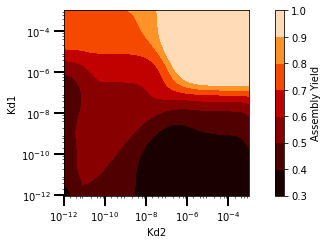

In [83]:
# Prep for plotting the heatmap

#import matplotlib.cm as cm
#from matplotlib.ticker import FormatStrFormatter
#import matplotlib
# from matplotlib.ticker import LogLocator


#AYmatPlt = np.flipud(kd1_kd2_AY_mat)
AYmatPlt = kd1_kd2_AY_mat

fig, ax = plt.subplots()
# im = ax.imshow(AYmatPlt)
CS = ax.contourf(allKd2, allKd1, AYmatPlt,cmap=plt.cm.gist_heat)
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Assembly Yield')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_aspect('equal')

# get ticks on log scale
ax.tick_params(axis="x", direction="out", length=10, width=2, color="black")
ax.tick_params(axis="y", direction="out", length=10, width=2, color="black")

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.xaxis.set_minor_locator(locmin); ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.set_xlabel('Kd2', fontsize=10)
ax.set_ylabel('Kd1', fontsize=10)

# plt.show()
# save figure
plt.tight_layout()
plt.savefig('LL_SR_heatmap_AYvsKd1vsKd2_n50_contour_'+today+'.eps')